# Student Performance Prediction — Decision Tree Classifier

This notebook predicts whether a student will pass or fail based on study hours, attendance, and prior scores using a **Decision Tree Classifier**. 

It is aligned with **SDG 4: Quality Education**, aiming to provide insights for educators and learners.


## Dataset Overview

- **Source:** UCI student performance dataset
- **Features:** 
  - `study_hours` → Hours studied per week
  - `attendance` → Class attendance percentage
  - `prior_scores` → Average previous grades
  - and More
- **Target:** 
  - `pass_fail` → 1 = Pass, 0 = Fail

### Key Notes:
- No missing data
- Check feature types and distributions


In [2]:
import pandas as pd

df = pd.read_csv("data/student-mat.csv", sep=";")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data Preprocessing

- Encoded categorical variables present
- Split data into **training set (70%)** and **testing set (30%)**

**Goal:** Prepare the dataset for modeling while maintaining integrity and consistency.


In [4]:
# Create target variable
df['pass'] = (df['G3'] >= 10).astype(int)

# Check distribution
df['pass'].value_counts()


pass
1    265
0    130
Name: count, dtype: int64

In [5]:
# Define feature set (early intervention scenario)
X = df.drop(columns=['G1', 'G2', 'G3', 'pass'])

y = df['pass']

# Quick sanity check
X.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: pass, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Sanity checks
X_train.shape, X_test.shape


((316, 39), (79, 39))

## Model Training

- Trained a **Decision Tree Classifier** on the training set
- Decision Trees are interpretable and suitable for small tabular datasets
- Default parameters used for rapid execution

**Output:** Trained model ready for evaluation


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = dt_model.predict(X_test)


## Model Evaluation

- Evaluated the model on the test set
- Metrics used:
  - Accuracy
  - Confusion Matrix

**Insights:**
- Understand where the model performs well


In [10]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6582278481012658


In [11]:
# Detailed performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49        26
           1       0.75      0.74      0.74        53

    accuracy                           0.66        79
   macro avg       0.62      0.62      0.62        79
weighted avg       0.66      0.66      0.66        79



In [12]:
# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[13 13]
 [14 39]]


In [13]:
import pandas as pd

# Feature importances
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Top 10 most important features
print(importances.head(10))


absences      0.160867
failures      0.160514
goout         0.087852
Fjob_other    0.059467
freetime      0.052546
Fedu          0.050073
famrel        0.048415
paid_yes      0.035831
health        0.035831
studytime     0.034267
dtype: float64


## Visualization

- Plotted the Decision Tree to visualize decision paths
- Helps interpret how the model is making predictions
- Saved as `outputs/student_prediction_tree_figure.png`


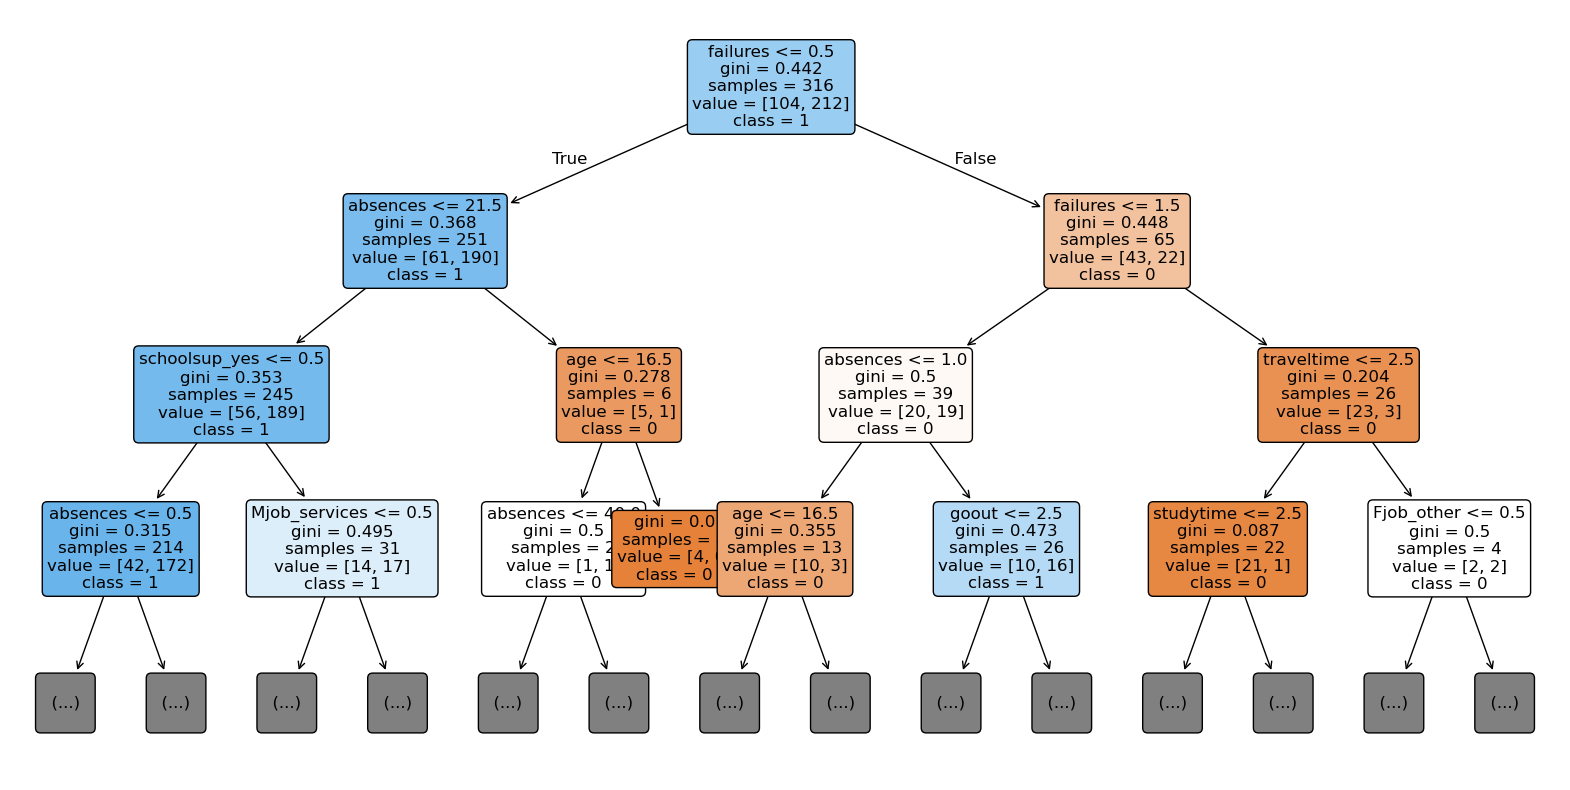

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree (limit depth for clarity)
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    max_depth=3,  # only show top 3 levels for readability
    fontsize=12
)

plt.savefig("student_prediction_tree_figure.png")

plt.show()


In [15]:
# Make sure you have the Outputs folder
import os
if not os.path.exists("Outputs"):
    os.makedirs("Outputs")

# Create results dataframe
import pandas as pd

# Assuming your test set is X_test, y_test, and your trained model is dt_model
predictions = dt_model.predict(X_test)

results_df = pd.DataFrame({
    "student_id": X_test.index,    # or range(len(X_test)) if no index
    "actual": y_test.values,       # actual target values
    "predicted": predictions       # model predictions
})

# Optional: add predicted probabilities if needed
if hasattr(dt_model, "predict_proba"):
    results_df["predicted_prob"] = dt_model.predict_proba(X_test)[:, 1]

# Save to CSV in Outputs folder
results_df.to_csv("Outputs/results.csv", index=False)

print("✅ results.csv created in Outputs/ folder")


✅ results.csv created in Outputs/ folder


## Key Insights from the Decision Tree

🎯 **Previous Failures Matter Most**  
- Students who have failed before are more likely to fail again.  
- Students with no previous failures have a much better chance of passing.

📚 **Study Time Helps At-Risk Students**  
- For students who have failed before, studying more is very important.  
- Those who study less than 2.5 hours per week are more likely to fail.

🏫 **Attendance is Important**  
- Students who miss many classes are more likely to fail.  
- Missing more than 21 classes is a strong warning sign.

👨‍👩‍👧 **School Support Helps**  
- Parental involvement (`schoolsup_yes`) helps students, especially those with some absences.

🚌 **Long Commutes Can Be a Problem**  
- Students who travel more than 2.5 hours to school have a higher risk of struggling.

⚠️ **Multiple Risk Factors Add Up**  
- When a student has several risks together (previous failures + long commute + low study time), the chance of passing drops significantly.

## Key Learnings

- Decision Trees can provide **interpretable predictions** for student performance
- Feature importance can highlight **critical factors for success**
- Aligning projects with **SDGs** ensures relevance for education and recruiters
- Detailed Decision Tree insights are in the visualization section above.
  > Overall, this project demonstrates how a Decision Tree can be used to predict student performance while keeping results interpretable, actionable, and aligned with real-world goals (SDG 4: Quality Education).


## Future Improvements

- Expand dataset for more real-world coverage
- Experiment with other models (Random Forest, XGBoost)
- Apply feature selection to improve accuracy
- Deploy model as a small web app or dashboard for educational insights
